In [1]:
#These are the libraries you can use.  You may add any libraries directy related to threading if this is a direction
#you wish to go (this is not from the course, so it's entirely on you if you wish to use threading).  Any
#further libraries you wish to use you must email me, james@uwaterloo.ca, for permission.

from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
import random
from datetime import datetime

## Group Assignment
### Team Number: 17
### Team Member Names: Jack, Jennifer, Justus, Precious
### Team Strategy Chosen: Market Meet (Market Beat or Market Meet)

Disclose any use of AI for this assignment below (detail where and how you used it).  Please see the course outline for acceptable uses of AI.


## Introduction
When finding an objective weighting system for our sorting and selection to operate with, we found it beneficial to draw upon more than just the returns of the stock but instead a combination of the returns, the stock’s market capitalization and the tracking error found from comparing the individual stock to the market. Although it may seem intuitive to just select the stocks that provide the closest average return to the market for our portfolio, the inclusion of the other three metrics in our rating index helps us to assess more than just the returns of each stock, but their overall place in the market.

In [5]:
## Read in portfolio of tickers and create a dataframe
start_date_required = '2023-10-01'
end_date_required = '2024-09-30'
count_days = 0
monthly_vol = []

# This function counts the monthly volume of the stock and finds the average monthly volume
def count_volume(ticker):
    ticker_hist = ticker.history(start=start_date_required, end=end_date_required)
    ticker_hist.index = ticker_hist.index.strftime('%Y-%m-%d')
    # Oct 2023
    filtered_df = ticker_hist.loc[(ticker_hist.index >= '2023-10-01')
                         & (ticker_hist.index < '2023-11-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # Nov 2023
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2023-11-01')
                             & (ticker_hist.index < '2023-12-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # Dec 2023
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2023-12-01')
                         & (ticker_hist.index < '2024-01-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # jan 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-01-01')
                             & (ticker_hist.index < '2024-02-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # Feb 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-02-01')
                             & (ticker_hist.index < '2024-03-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # March 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-03-01')
                             & (ticker_hist.index < '2024-04-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # April 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-04-01')
                             & (ticker_hist.index < '2024-05-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # May 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-05-01')
                             & (ticker_hist.index < '2024-06-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
    
        # June 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-06-01')
                             & (ticker_hist.index < '2024-07-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # July 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-07-01')
                             & (ticker_hist.index < '2024-08-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # Aug 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-08-01')
                             & (ticker_hist.index < '2024-09-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
         
        # Sept 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-09-01')
                             & (ticker_hist.index < '2024-10-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))

    return np.mean(monthly_vol)


In [6]:
## function that takes in a dataframe of stock tickers removes unlisted, low volume or stocks not denominated in USD or CAD
def remove_unwanted(df):
    drop_rows = []
    for i in range(len(df) - 1):
        try:
            ticker = yf.Ticker(df.iloc[i,0])
            currency = ticker.info.get('currency')
            if currency not in ['USD', 'CAD']:
                drop_rows.append(i)
                continue
            if (count_volume(ticker) < 100000):
                drop_rows.append(i)
                continue
        except: 
            drop_rows.append(i)
            continue
    df.drop(drop_rows, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [7]:
# Retrieving tickers from csv file
tickers = pd.read_csv('custom_tickers.csv', header=None)
tickers = tickers.rename(columns={0: 'Ticker'})

df = remove_unwanted(tickers)
df

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PEAK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PEAK&crumb=%2FeUtbp%2FWj5p


,Ticker
0,AAPL
1,ADBE
2,AER
3,ALB
4,AMGN
5,BABA
6,BB.TO
7,CAG
8,COIN
9,CRL


## Choosing our Time Frame For S&P500 and TSX60
We decided to create our portfolio with a three year time period, from 2021-01-01 to 2024-11-01. Choosing a three year period allows us to mitigate short term market volatility that could distort the relationship between the portfolio and the S&P500 and TSX60 indices. For instance, a shorter time period such as one year may include anomalies from recent trends in the market that do not accurately reflect the portfolio long term. This is especially important when calculating volatility as it can be inflated by short-term price swings. Furthermore, a three year time period is long enough to capture different market cycles to provide a more accurate representation of how the portfolio will perform under different market conditions. This ensures the portfolio is not biased towards a single market trend, allowing us to better evaluate its consistency. 

In [9]:
# Retrieving data from S&P500 
start_date = '2021-01-01'
end_date = '2024-11-02'

sp500_ticker = yf.Ticker('^GSPC')
sp500 = sp500_ticker.history(start=start_date, end=end_date, interval='1mo')[['Close']]
sp500.index = sp500.index.strftime('%Y-%m-%d')
sp500_returns = sp500.ffill().pct_change().dropna()
sp500_returns.rename(columns={'Close': 'S&P500 Returns'}, inplace=True)
sp500

,Close
Date,
2021-01-01,3714.239990
2021-02-01,3811.149902
2021-03-01,3972.889893
2021-04-01,4181.169922
2021-05-01,4204.109863
2021-06-01,4297.500000
2021-07-01,4395.259766
2021-08-01,4522.680176
2021-09-01,4307.540039


In [10]:
# Getting tsx historical data
tsx_ticker = yf.Ticker('XIU.TO')
tsx = tsx_ticker.history(start=start_date,end=end_date, interval='1mo')[['Close']]
tsx.index = tsx.index.strftime('%Y-%m-%d')
tsx_returns = tsx.ffill().pct_change().dropna()
tsx_returns.rename(columns={'Close': 'TSX60 Returns'}, inplace=True)


In [11]:
# The percentage change should be (end_price - start_price) / start_price
sp500_start_price = sp500.iloc[0]['Close']
sp500_end_price = sp500.iloc[-1]['Close']
sp500_pct_change = (sp500_end_price - sp500_start_price) / sp500_start_price

tsx_start_price = tsx.iloc[0]['Close']
tsx_end_price = tsx.iloc[-1]['Close']
tsx_pct_change = (tsx_end_price - tsx_start_price) / tsx_start_price

avg_pct_change = (sp500_pct_change + tsx_pct_change) / 2

In [12]:
# combining dataframe to get total pct change 
sp500tsx60 = sp500_returns.join(tsx_returns)
sp500tsx60['Total % Change'] = sp500tsx60.mean(axis=1)
sp500tsx60.head()

,S&P500 Returns,TSX60 Returns,Total % Change
Date,,,
2021-02-01,0.026091,0.036510,0.031301
2021-03-01,0.042439,0.052981,0.047710
2021-04-01,0.052425,0.023050,0.037737
2021-05-01,0.005486,0.030849,0.018168
2021-06-01,0.022214,0.033423,0.027818


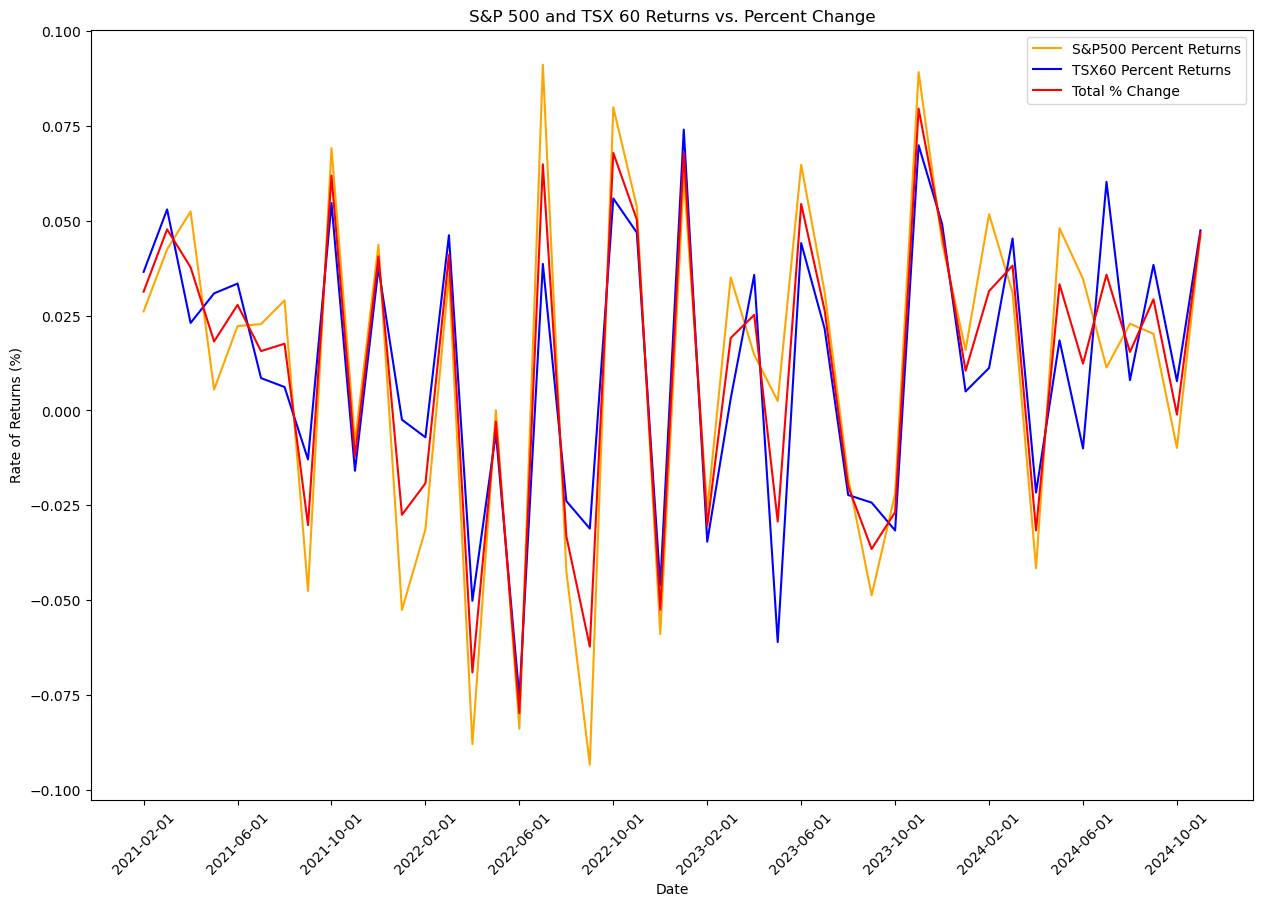

In [13]:
# Plotting the S&P 500 and TSX 60 Returns alongside the percent change
plt.figure(figsize=(15,10))

plt.plot(sp500tsx60["S&P500 Returns"], color = 'orange',  label="S&P500 Percent Returns")
plt.plot(sp500tsx60["TSX60 Returns"], color = 'blue',  label="TSX60 Percent Returns")
plt.plot(sp500tsx60["Total % Change"], color = 'red',  label="Total % Change")
plt.xticks( ["2021-02-01", "2021-06-01", "2021-10-01", "2022-02-01", "2022-06-01", "2022-10-01", 
             "2023-02-01", "2023-06-01", "2023-10-01", "2024-02-01", "2024-06-01", "2024-10-01"], rotation = 45)

plt.title('S&P 500 and TSX 60 Returns vs. Percent Change')
plt.ylabel('Rate of Returns (%)')
plt.xlabel('Date')
plt.legend(loc='best')

The graph above analyzes the Rate of Return for the S&P 500 and the TSX and thier total percent change. Using these metrics we can see the general trend that is being followed by both indexes, with either rising and falling by about the same amount as the other, made even more clear by the overlapping lines. Considering historical rates of return can tell us about how profitable an investment was in the past and can lead use to infer about the future. In our cause, looking at this data gives us a pathway that we would like our own ideal portfolio to follow. If our portfolio can also match the pace of the trend lines above, and hence match around the same rate of return historically, then it is more likely to meet the market index as it's rate or returns will also follow the S&P and TSX 60 as closesly as possible.

In [15]:
sp500SD = sp500tsx60["S&P500 Returns"].std()
tsx60SD = sp500tsx60["TSX60 Returns"].std()

print("The standard deviation of the TSX60 over the period of data is:", np.round(tsx60SD, 5))
print("The standard deviation of the S&P 500 over the period of data is:", np.round(sp500SD, 5))

The standard deviation of the TSX60 over the period of data is: 0.03667
The standard deviation of the S&P 500 over the period of data is: 0.04669


## Determining Our Ideal Stocks In Our Portfolio

### Market Cap
First, we decided upon including market capitalization in our stock picking method because of how the S&P 500 and the TSX 60 are created and maintained. In both of these indexes, a larger cap stock is given more weight in the index than a smaller cap stock, as the goal of these indexes is to provide a sample that represents the entire market. What this means for us is if we pick a higher market capitalization stock, it is more likely to influence the market indexes we are comparing our portfolio to.  

### Tracking Error
The second special metric we are using to determine our portfolio is tracking error. Tracking error is defined as

Tracking Error = Standard Deviation of (P - B)

Where P is the percent return of a portfolio or individual stock and B is the benchmark or market return. This metric proves very useful in determining the risk of a stock relative to the market, as a stock that moves consistently with the market will often have a very low tracking error. We decided to include this metric in our portfolio development because, in the case of a long term portfolio, we want to mitigate risk, not invite it. For example, if a stock were to have adequate returns for our portfolio but a very high tracking error compared to the market, the stock is risky and may lead to uncertainty in a long term portfolio. 


In [17]:
# Default weight on the factors
market_value_weight = 1
returns_weight = 0.001
tracking_error_weight = 0.1

# achieve data from yahoo finance
market_returns = sp500tsx60['Total % Change'].mean()
total_market_value = 50578000000000 # The total market cap of S&P 500 and TSX 60

# rating gives every stock a rating and sorts them in non-increasing order
# Four factors to be considered:
    # 1. Market Value
    # 2. Returns
    # 3. Tracking Error 
# A higher rating means the stock aligns better with the true market index.
def rating(dataframe):
    for stock, row in dataframe.iterrows():
        # Get the closing prices of the stock 
        stock_tick = yf.Ticker(row["Ticker"])
        stock_data = stock_tick.history(start=start_date, end=end_date, interval='1mo')[['Close']]
        #stock_data.index = stock_data.index.strftime('%Y-%m-%d')
        # calculate returns for stock
        stock_returns_df = stock_data.ffill().pct_change().dropna()
        
        # Step 1: Calculate Market Value Score
        stock_market_value = stock_tick.fast_info['marketCap']
        market_value_score = stock_market_value / total_market_value
        dataframe.at[stock, "Market value score"] = market_value_score

        # Step 2: Calculate Returns Score
        stock_returns = stock_returns_df['Close'].mean() 
        returns_score = abs(stock_returns - market_returns)
        dataframe.at[stock, "Returns score"] = 1 / returns_score

        # Step 3: Calculate tracking error score 
        tracking_error = (stock_returns_df['Close'] - market_returns).std()
        dataframe.at[stock, "Tracking error score"] = 1 / tracking_error
        
        # Step 4: Calculate rating of the stock based on weight
        dataframe["Rating"] = dataframe["Market value score"] * market_value_weight + dataframe["Returns score"] * returns_weight + dataframe["Tracking error score"] * tracking_error_weight 
                              

    # Sort the rating in descending order
    sorted_df = dataframe.sort_values(by='Rating', ascending=False)
    return sorted_df

df_ratings = rating(df)
df_ratings

,Ticker,Market value score,Returns score,Tracking error score,Rating
29,MCD,0.004113,891.076898,19.474276,2.842617
26,KO,0.005444,588.768302,20.556859,2.649898
50,V,0.011858,862.950409,16.520653,2.526874
13,ENB.TO,0.002604,377.713762,21.248899,2.505208
18,GILD,0.002222,986.507893,14.602056,2.448936
23,JNJ,0.007386,106.761632,22.288604,2.343008
40,RY.TO,0.004886,218.705801,19.677188,2.191311
47,TD.TO,0.002742,214.305651,19.483327,2.165380
7,CAG,0.000259,84.785574,19.096387,1.994683
46,T.TO,0.000627,94.805377,18.884682,1.983901


In [18]:
chosen_stocks = []
def select_stocks(numStocks, df):
    chosen_stocks = df.iloc[:numStocks, :].copy()
    return chosen_stocks[['Ticker', 'Rating']]

chosen_stocks = select_stocks(24, df_ratings)
chosen_stocks

,Ticker,Rating
29,MCD,2.842617
26,KO,2.649898
50,V,2.526874
13,ENB.TO,2.505208
18,GILD,2.448936
23,JNJ,2.343008
40,RY.TO,2.191311
47,TD.TO,2.165380
7,CAG,1.994683
46,T.TO,1.983901


In [19]:
def calculate_weight(dataframe):
    n = len(dataframe)
    
     # Step 1: Initialize reassign_list with proportional values
    total_rating = dataframe['Rating'].sum()
    reassign_dataframe = dataframe[['Ticker', 'Rating']].copy()
    reassign_dataframe['proportional_rating'] = reassign_dataframe['Rating'] / total_rating

    # Step 2: Set each weight to the minimum weight
    min_weight = 100 / (2 * n) / 100
    max_weight = 0.15
    dataframe['Weight'] = min_weight
    remaining_weight = 1 - dataframe['Weight'].sum()
    
    # Step 3: Assign the remaining 
    while remaining_weight > 0:
        total_proportional_rating = reassign_dataframe['proportional_rating'].sum()
        adjustment_factor = remaining_weight / total_proportional_rating
        
        reassign_dataframe['additional_weight'] = reassign_dataframe['proportional_rating'] * adjustment_factor
        reassign_dataframe['new_weight'] = reassign_dataframe['additional_weight'] + dataframe.set_index('Ticker').loc[reassign_dataframe['Ticker'], 'Weight'].values

        for index, row in reassign_dataframe.iterrows():
            stock_name = row['Ticker']
            new_weight = row['new_weight']

            if new_weight > max_weight:
                excess = new_weight - max_weight
                dataframe.loc[dataframe['Ticker'] == stock_name, 'Weight'] = max_weight
                remaining_weight -= row['additional_weight'] - excess
                reassign_dataframe.drop(index, inplace=True)
            else:
                dataframe.loc[dataframe['Ticker'] == stock_name, 'Weight'] = new_weight
                remaining_weight -= row['additional_weight']

        remaining_weight = max(0, remaining_weight)

    dataframe['Weight'] = dataframe['Weight'] * 100 / dataframe['Weight'].sum()
    return dataframe

portfolio_weight = calculate_weight(chosen_stocks)
portfolio_weight

,Ticker,Rating,Weight
29,MCD,2.842617,5.247066
26,KO,2.649898,5.032576
50,V,2.526874,4.895654
13,ENB.TO,2.505208,4.871540
18,GILD,2.448936,4.808912
23,JNJ,2.343008,4.691019
40,RY.TO,2.191311,4.522184
47,TD.TO,2.165380,4.493325
7,CAG,1.994683,4.303345
46,T.TO,1.983901,4.291344


In [20]:
# This function calculates the number of shares we can buy for each stock based on the given budget and their prices on the start_date.
final_start_date = '2024-11-22'
final_end_date = '2024-12-02'

def calculate_shares(stocks, start_date, end_date): 
    n = 1000000  # budget
    shares_list = []
    exchange_ticker = yf.Ticker('CADUSD=x')
    exchange_rate_df = exchange_ticker.history(start=start_date, end=end_date, interval='1mo')
    exchange_rate = exchange_rate_df.iloc[0]['Close']
    for stock, row in stocks.iterrows():
        stock = yf.Ticker(row["Ticker"])
        weight = row["Weight"] / 100
        stock_data = stock.history(start=start_date, end=end_date, interval='1mo') 
        price = stock_data.iloc[0]['Close'] # price on the start day
        
        # Exchanging currency if needed
        if stock.info["currency"] == "USD":
            cad_price = price * (1 / exchange_rate)  
        else: 
            cad_price = price
            
        # Getting number of shares with fee
        shares_expenditure = n * weight
        raw_shares = shares_expenditure / cad_price
        if raw_shares > 3950:
            shares = (shares_expenditure - 3.95) / cad_price
        else:
            shares = shares_expenditure / (cad_price + 0.001)
            
        shares_list.append(shares)
        
    stocks['Shares'] = shares_list
    return stocks

portfolio_shares = calculate_shares(portfolio_weight, final_start_date, final_end_date)
portfolio_shares

,Ticker,Rating,Weight,Shares
29,MCD,2.842617,5.247066,215.158475
26,KO,2.649898,5.032576,916.659032
50,V,2.526874,4.895654,204.159219
13,ENB.TO,2.505208,4.871540,1487.159245
18,GILD,2.448936,4.808912,670.666151
23,JNJ,2.343008,4.691019,249.721924
40,RY.TO,2.191311,4.522184,509.848410
47,TD.TO,2.165380,4.493325,737.970614
7,CAG,1.994683,4.303345,1140.746754
46,T.TO,1.983901,4.291344,1980.795540


In [21]:
# This function calculates the total portfolio value on the end_date based on the shares bought on the start_date.
def calculate_value(stocks, start_date, end_date):
    exchange_ticker = yf.Ticker('CADUSD=X')
    exchange_rate_df = exchange_ticker.history(start=start_date, end=end_date, interval='1mo')[['Close']]
    exchange_rate = exchange_rate_df.iloc[-1]['Close']
    total_value = 0

    for _, row in stocks.iterrows():
        ticker_symbol = row['Ticker']
        shares = row['Shares']

        ticker = yf.Ticker(ticker_symbol)
        stock_data = ticker.history(start=start_date, end=end_date, interval='1mo')[['Close']]
        price = stock_data.iloc[-1]['Close']
        currency = ticker.info.get('currency')

        # Convert to CAD if needed
        if currency == 'USD':
            price_cad = price / exchange_rate
        else:
            price_cad = price

        # Add to total portfolio value
        total_value += shares * price_cad

    return total_value

portfolio_value = calculate_value(portfolio_shares, final_start_date, final_end_date)
print('The average percentage change of the S&P 500 and TSX 60 over the three-year period is approximately ', np.round(avg_pct_change * 100, 4), '%.', sep='')
print('The percentage change of our portfolio is ', np.round((portfolio_value - 1000000) / 1000000 * 100, 4), '%.', sep='')

The average percentage change of the S&P 500 and TSX 60 over the three-year period is approximately 62.8392%.
The percentage change of our portfolio is 72.0218%.


Average percent change tells us the rate of return on avergae for the three year time range we chose. Given this extensive period of time and our goal to meet the market we are looking for our portfolio's rate of return to come as close as possible to the combined rate of return of the S&P 500 and the TSX 60. Our results tell us that the closer these rates are the more closely our portfolio will track the S&P 500 and TSX 60. 

## Change Date Below

In [24]:
# print Portfolio_Final 
def build_portfolio(stocks, start_date, end_date):
    exchange_ticker = yf.Ticker('CADUSD=x')
    exchange_rate_df = exchange_ticker.history(start=start_date, end=end_date, interval='1d')
    exchange_rate = exchange_rate_df.iloc[0]['Close']
    portfolio = []

    # Iterate over stocks to calculate price and value
    for _, row in stocks.iterrows():
        ticker_symbol = row["Ticker"]
        shares = row["Shares"]
        weight = row["Weight"]

        # Fetch price
        ticker = yf.Ticker(ticker_symbol)
        stock_data = ticker.history(start=start_date, end=end_date, interval='1d')[['Close']]
        price = stock_data.iloc[0]['Close']
        currency = ticker.info.get("currency")

        # Convert all USD to CAD
        if currency == 'USD':
            price_cad = price / exchange_rate
            currency = 'CAD'
        else:
            price_cad = price

        # Add the stock details to the portfolio
        portfolio.append({
            'Ticker': ticker_symbol,
            'Price': round(price_cad, 2),
            'Currency': currency,
            'Shares': round(shares, 2),
            'Value': round(shares * price_cad, 2),
            'Weight': weight
        })

    # Convert the portfolio into a DataFrame
    portfolio_df = pd.DataFrame(portfolio)
    portfolio_df.index += 1  # Make the index 1-based
    return portfolio_df

Portfolio_Final = build_portfolio(portfolio_shares, final_start_date, final_end_date)
print("Portfolio_Final:")
print(Portfolio_Final)
print(Portfolio_Final["Value"].sum())

Portfolio_Final:
     Ticker   Price Currency    Shares     Value    Weight
1       MCD  238.43      CAD    215.16  51301.28  5.247066
2        KO   58.15      CAD    916.66  53303.96  5.032576
3         V  261.20      CAD    204.16  53325.64  4.895654
4    ENB.TO   31.15      CAD   1487.16  46321.31  4.871540
5      GILD   63.51      CAD    670.67  42594.37  4.808912
6       JNJ  174.20      CAD    249.72  43502.46  4.691019
7     RY.TO   89.71      CAD    509.85  45736.90  4.522184
8     TD.TO   60.45      CAD    737.97  44610.08  4.493325
9       CAG   37.93      CAD   1140.75  43268.21  4.303345
10     T.TO   20.88      CAD   1980.80  41366.72  4.291344
11      WMT   57.02      CAD    758.31  43241.69  4.289046
12     AMGN  246.93      CAD    153.25  37842.52  4.169936
13     MSFT  259.87      CAD    144.21  37475.01  4.130945
14     AAPL  156.28      CAD    240.13  37527.93  3.958797
15      KHC   35.96      CAD   1085.33  39032.54  3.953099
16      IBM  122.05      CAD    319.29 

In [25]:
def export_csv(portfolio):
    Stocks_Final = portfolio[['Ticker', 'Shares']].copy()
    filename = "Stocks_Group_17.csv"
    Stocks_Final.to_csv(filename, index=False)
    return Stocks_Final

In [26]:
def portfolio_returns(portfolio):
    stock_returns_df = pd.DataFrame()

    for i in range(len(portfolio)):

        #Getting the exchange rate ticker data
        exchange_ticker = yf.Ticker('CADUSD=x')
        exchange_rate_df = exchange_ticker.history(start=start_date, end=end_date, interval='1d')
        exchange_rate = exchange_rate_df.iloc[0]['Close']

        #Get the closing prices of the stock 
        stock_tick = yf.Ticker(portfolio.iloc[i,0])
        stock_data = stock_tick.history(start=start_date, end=end_date, interval='1mo')[['Close']]
        stock_data.index = stock_data.index.strftime('%Y-%m-%d')
        currency = stock_tick.info.get("currency")

        #Convert all USD to CAD
        if currency == 'USD':
            price_cad = stock_data / exchange_rate
            currency = 'CAD'
        else:
            price_cad = stock_data

        stock_returns_df[stock_tick] = price_cad * portfolio.iloc[i,3]


    stock_returns_df['Value'] = stock_returns_df.sum(axis=1)

    return stock_returns_df
    
stock_returns_df = portfolio_returns(Portfolio_Final)


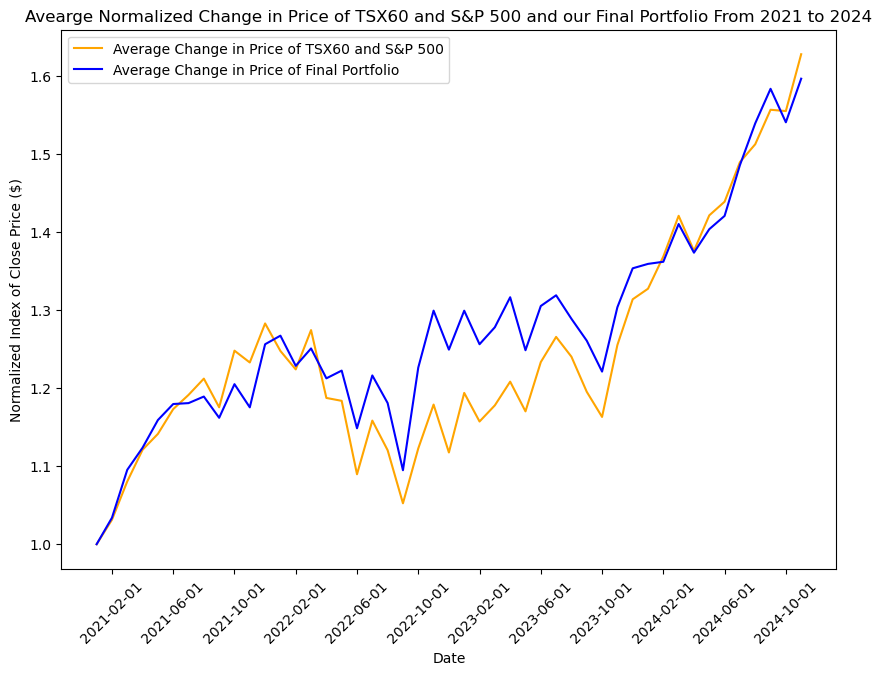

In [27]:
# Plotting the S&P 500 and TSX 60 Returns alongside the percent change
plt.figure(figsize=(10,7))

# Normalizing each close by the first close price to see the changes in prices, disregarding the intial value of either stock
avg_market_closeprice = ((sp500.Close/sp500.Close.iloc[0]) + (tsx.Close/tsx.Close.iloc[0]))/2
plt.plot(avg_market_closeprice, color = 'orange',  label="Average Change in Price of TSX60 and S&P 500")
plt.plot(stock_returns_df.Value/stock_returns_df.Value.iloc[0], color = 'blue',  label="Average Change in Price of Final Portfolio")

#plt.plot(tsx.Close/tsx.Close.iloc[0], color = 'blue',  label="TSX60 Close Price")
# plt.plot(.Close/tsx.Close.iloc[0], color = 'blue',  label="TSX60 Close Price")
plt.xticks( ["2021-02-01", "2021-06-01", "2021-10-01", "2022-02-01", "2022-06-01", "2022-10-01", 
             "2023-02-01", "2023-06-01", "2023-10-01", "2024-02-01", "2024-06-01", "2024-10-01"], rotation = 45)

plt.title('Avearge Normalized Change in Price of TSX60 and S&P 500 and our Final Portfolio From 2021 to 2024')
plt.ylabel('Normalized Index of Close Price ($)')
plt.xlabel('Date')
plt.legend(loc='best')

In [28]:
corrleation  = np.corrcoef((stock_returns_df.Value/stock_returns_df.Value.iloc[0]), avg_market_closeprice)

corrleation

array([[1.        , 0.94575992],
       [0.94575992, 1.        ]])

## Final Remarks  
The correlation coeffiecent looks at the average of residuals between the two lines above. The closer these two lines are, the more likely the movement of the portfolio in this case, would be effected by the movement of the indexes. That is to say that a high correlation means that our portfolio tracks the average of the S&P and TSX 60 not only closely but accurately as it falls in lock step with the trend of the indexes. 

In [30]:
print("Portfolio_Final:")
print(Portfolio_Final)

Portfolio_Final:
     Ticker   Price Currency    Shares     Value    Weight
1       MCD  238.43      CAD    215.16  51301.28  5.247066
2        KO   58.15      CAD    916.66  53303.96  5.032576
3         V  261.20      CAD    204.16  53325.64  4.895654
4    ENB.TO   31.15      CAD   1487.16  46321.31  4.871540
5      GILD   63.51      CAD    670.67  42594.37  4.808912
6       JNJ  174.20      CAD    249.72  43502.46  4.691019
7     RY.TO   89.71      CAD    509.85  45736.90  4.522184
8     TD.TO   60.45      CAD    737.97  44610.08  4.493325
9       CAG   37.93      CAD   1140.75  43268.21  4.303345
10     T.TO   20.88      CAD   1980.80  41366.72  4.291344
11      WMT   57.02      CAD    758.31  43241.69  4.289046
12     AMGN  246.93      CAD    153.25  37842.52  4.169936
13     MSFT  259.87      CAD    144.21  37475.01  4.130945
14     AAPL  156.28      CAD    240.13  37527.93  3.958797
15      KHC   35.96      CAD   1085.33  39032.54  3.953099
16      IBM  122.05      CAD    319.29 

In [31]:
export_csv(Portfolio_Final)

,Ticker,Shares
1,MCD,215.16
2,KO,916.66
3,V,204.16
4,ENB.TO,1487.16
5,GILD,670.67
6,JNJ,249.72
7,RY.TO,509.85
8,TD.TO,737.97
9,CAG,1140.75
10,T.TO,1980.80


## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Jack,
Jennifer,
Justus,
Precious 
